In [1]:
%matplotlib inline
import cv2 # OpenCV
import matplotlib.pyplot as plt # Matplotlib
import numpy as np # Numpy
import scipy
from scipy import ndimage
from pylab import *
import scipy.signal as signal

<class 'numpy.ndarray'>


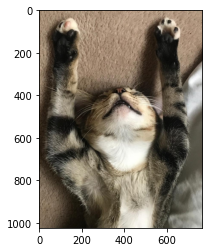

In [2]:
#1 carregar uma imagem em escala de cinza
img = cv2.imread('gatineo.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
monocromatica = cv2.cvtColor(cv2.cvtColor(img,cv2.COLOR_RGB2GRAY), cv2.COLOR_GRAY2RGB) #preto e branco
#cv2.imshow("imagem", img)
#cv2.waitKey(0)  
#cv2.destroyAllWindows()  
print(type(img))
imshow(img)

In [3]:
#2 Função para receber um filtro e aplicar o 2D separável

#OBS: presumindo que o filtro dado será coluna ou linha (1D)

def filtro_separavel(kernel,img):
    print(kernel.shape)
    img_linha = cv2.filter2D(img, -1, kernel) #convoluindo com um filtro 1d
    #kernel = np.array([kernel]) #necessario para vetores 1D
    kernel.transpose() #transpondo o kernel
    print(kernel.shape)
    img_final = cv2.filter2D(img_linha, -1, kernel) #convoluindo com o mesmo filtro, transposto
    return(img_linha,img_final)
    

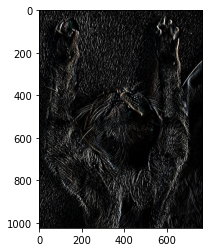

In [24]:
filtro =  np.array([[-10,0,10],[-20, 0, 20],[-10,0,10]])/8 #kernel derivativo de exemplo
pronto = cv2.filter2D(img, -1, filtro)
imshow(pronto)

In [25]:
def trunca(result):
    l = len(result)
    x = arange(0,l)
    stem(x, result)
    #ax.set_ylim(-2,2)
    ylabel('h[n]')
    xlabel(r'n (amostras)')
    title(r'Filtro derivador com 16 pontos em um intervalo simétrico e deslocado (Causal)')

    

/home/thamires/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in cdouble_scalars
  
/home/thamires/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


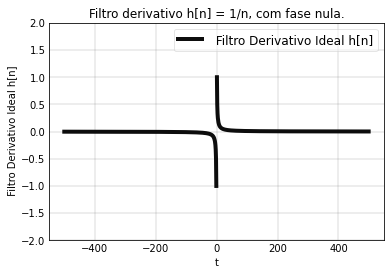

[-0.125      -0.14285714 -0.16666667 -0.2        -0.25       -0.33333333
 -0.5        -1.          1.          1.          0.5         0.33333333
  0.25        0.2         0.16666667  0.125     ]


NameError: name 'trunca' is not defined

In [4]:
import numpy as np
import matplotlib.pyplot as plt # Matplotlib

#Calculando a inversa, filtro
def foo(x):
    return -1j*((2j*np.pi*x*np.exp(2j*np.pi*x) - np.exp(2j*np.pi*x) + 1) / (2*np.pi*x**2))
    #return int((1/n))

result = []
n = []
for i in range(-500,500):
    result.append(foo(i))
    n.append(i)
    
#Plotando    
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='w', axisbelow=True)
ax.plot(n, result, 'k', alpha=0.95, lw=4, linestyle='-', label=' Filtro Derivativo Ideal h[n]')

ax.legend(loc='best')
ax.set_title("Filtro derivativo h[n] = 1/n, com fase nula.")
ax.set_xlabel('t')
ax.set_ylabel(' Filtro Derivativo Ideal h[n]')
ax.set_ylim(-2,2)

ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='0.45', lw=0.25, ls='-')
legend = ax.legend(prop={'size': 12})
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(True)

plt.show()

#Truncando em 16 pontos em um intervalo simétrico e deslocando para ficar causal:
#a = signal.firwin(16, cutoff = 0.3, window = "boxcar")

fir =np.zeros(16)
for i in range(-8,9):
    if i==0:
        fir[8] = 1
    else:
        if i==8:
            fir[15]=(1/i)
        else:
            fir[i+8]= (1/i)
print(fir)
trunca(fir)




In [4]:
w, h = scipy.signal.freqz([-0.25, 1.0], [1.0, -0.25])
print(w)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
#monocromatica = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) #preto e branco
#print(monocromatica.shape)
#mask =[[-0.5, 1.0, 0.0],[1.0, -0.5, 0.0]]
#result =signal.order_filter(monocromatica, mask, 0)

#polo1= np.fft.ifft(h)
#trunca(response)
#result = cv2.cvtColor(result,cv2.COLOR_GRAY2RGB)
#imshow((result))

[0.         0.00613592 0.01227185 0.01840777 0.02454369 0.03067962
 0.03681554 0.04295146 0.04908739 0.05522331 0.06135923 0.06749515
 0.07363108 0.079767   0.08590292 0.09203885 0.09817477 0.10431069
 0.11044662 0.11658254 0.12271846 0.12885439 0.13499031 0.14112623
 0.14726216 0.15339808 0.159534   0.16566993 0.17180585 0.17794177
 0.18407769 0.19021362 0.19634954 0.20248546 0.20862139 0.21475731
 0.22089323 0.22702916 0.23316508 0.239301   0.24543693 0.25157285
 0.25770877 0.2638447  0.26998062 0.27611654 0.28225246 0.28838839
 0.29452431 0.30066023 0.30679616 0.31293208 0.319068   0.32520393
 0.33133985 0.33747577 0.3436117  0.34974762 0.35588354 0.36201947
 0.36815539 0.37429131 0.38042724 0.38656316 0.39269908 0.398835
 0.40497093 0.41110685 0.41724277 0.4233787  0.42951462 0.43565054
 0.44178647 0.44792239 0.45405831 0.46019424 0.46633016 0.47246608
 0.47860201 0.48473793 0.49087385 0.49700978 0.5031457  0.50928162
 0.51541754 0.52155347 0.52768939 0.53382531 0.53996124 0.546097

In [ ]:
#filtro iir
num= np.exp(-1j*w) -0.25
den = 1 - 0.25*np.exp(-1j*w)
a, b = scipy.signal.bilinear(num, den, fs=1.0)
#result = scipy.signal.lfilter([-0.25, 1.0], [1.0, -0.25],img)
#cv2.imshow("imagem", result)
#cv2.waitKey(0)  
#cv2.destroyAllWindows()  

In [28]:
w, h = scipy.signal.freqz([-0.25, 1.0], [1.0, -0.25])
inversa= np.fft.ifft(h)*0.25
print(type(inversa))
#result = np.copy(monocromatica)
#for i in range(monocromatica.shape[0]):
#    result[i] = signal.convolve(monocromatica[i], inversa)
#polo1 = []
#n = []
#for i in range(-25,25):
#    polo1.append(np.abs(inversa[i]))
#   n.append(i)
    
#polo1 = np.array(polo1)
#imshow(result)
#trunca(polo1)

<class 'numpy.ndarray'>


(2, 2)
(2, 2)


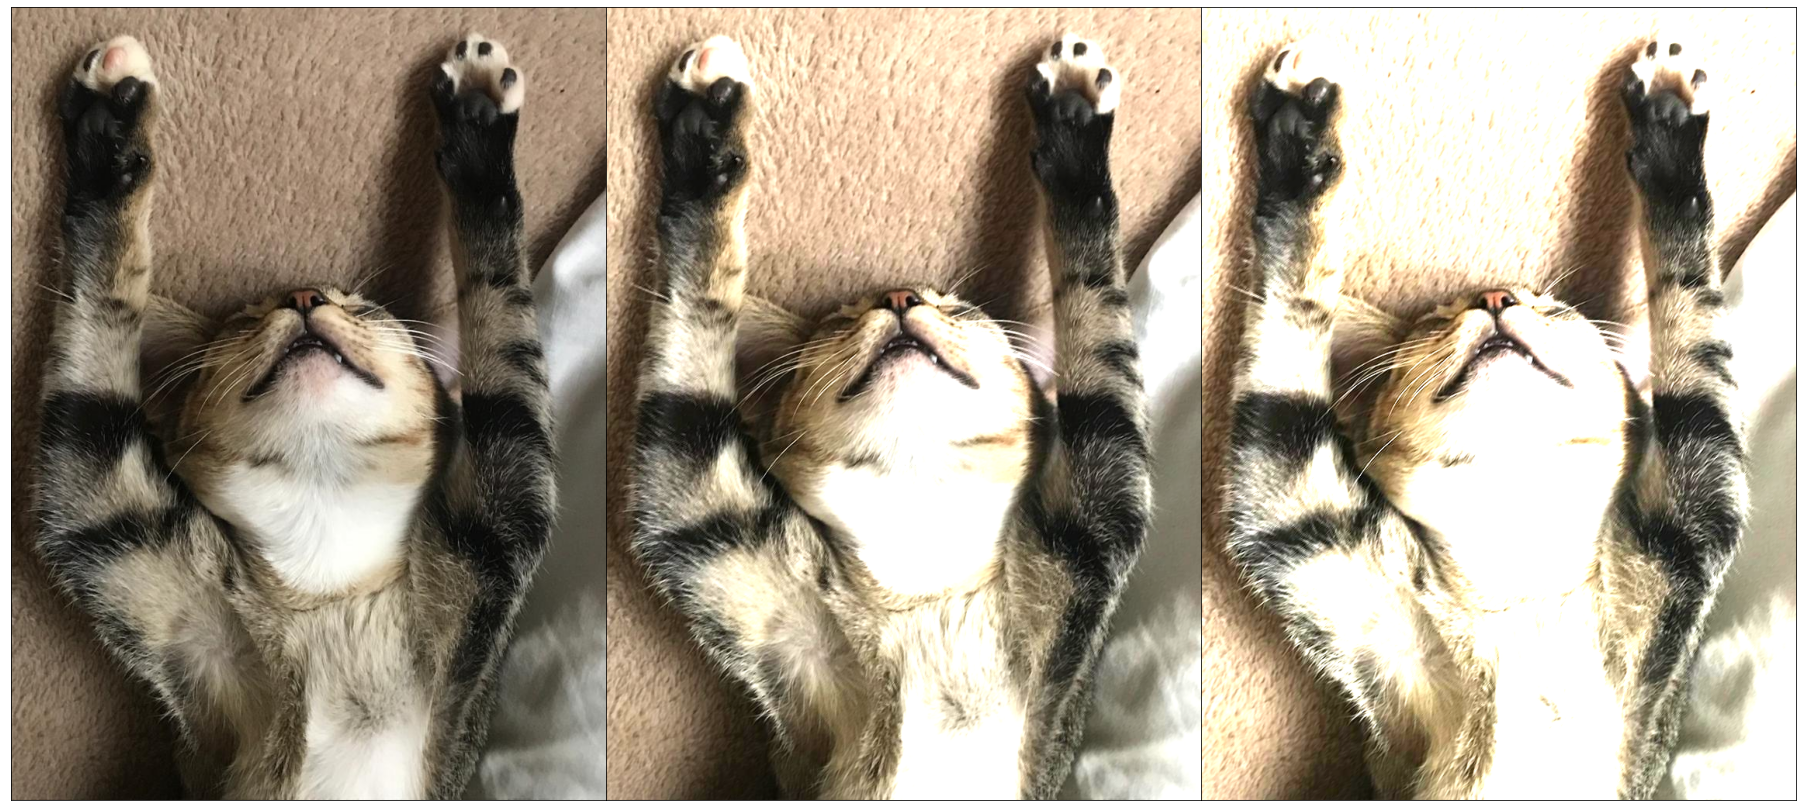

In [33]:
#testando para filtro de média, filtro gaussiano, sharpening e derivativo proposto por nós (h[n])

#filtro =  np.array([[-1,-1,-1],[-1, 9,-1],[-1,-1,-1]])  #sharpening 

#filtro = np.ones((1, 11), dtype="float32")/11   #media
#filtro = cv2.getGaussianKernel(ksize=10, sigma=0)  #gaussiano
#filtro =  np.array([[-5,0,5],[-10, 0, 10],[-5,0,5]])/5# kernel derivador ideal exemplo
teste = np.array([[-0.25,1],[1, -0.25]])

#linha, final =filtro_separavel(fir, img) #derivativo proposto
linha, final = filtro_separavel(teste, img)
#linha, teste = filtro_separavel(testek, img)
fig, ax = plt.subplots(1, 3, figsize=(32, 32))

fig.subplots_adjust(hspace=0, wspace=0)

ax[2].xaxis.set_major_locator(plt.NullLocator())
ax[2].yaxis.set_major_locator(plt.NullLocator())
ax[2].imshow(final)    

#u, orig = filtro_separavel(filtro, img)
ax[1].xaxis.set_major_locator(plt.NullLocator())
ax[1].yaxis.set_major_locator(plt.NullLocator())
ax[1].imshow(linha)

ax[0].xaxis.set_major_locator(plt.NullLocator())
ax[0].yaxis.set_major_locator(plt.NullLocator())
ax[0].imshow(img)




#img_borradalinha = cv2.filter2D(img, -1, kernel)
#kernel = kernel.transpose()
#img_borradacol = cv2.filter2D(img_borradalinha, -1, kernel)
#img_borradacol = img_borradacol.transpose()
#img_borradacol = cv2.cvtColor(img_borradacol, cv2.COLOR_GRAY2RGB)


#imagem_borrada = cv2.GaussianBlur(img, (1,5), 0) #convoluindo com um filtro 1d
#imagem_borrada = imagem_borrada.transpose()     #transpondo o resultado
#imagem_borrada = cv2.GaussianBlur(img, (1,5), 0) #convoluindo com o mesmo filtro
#imagem_borrada = imagem_borrada.transpose()     #transpondo o resultado




#img_borradalinha = cv2.cvtColor(img_borradalinha, cv2.COLOR_GRAY2RGB)






In [104]:
monocromatica == result


array([[False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

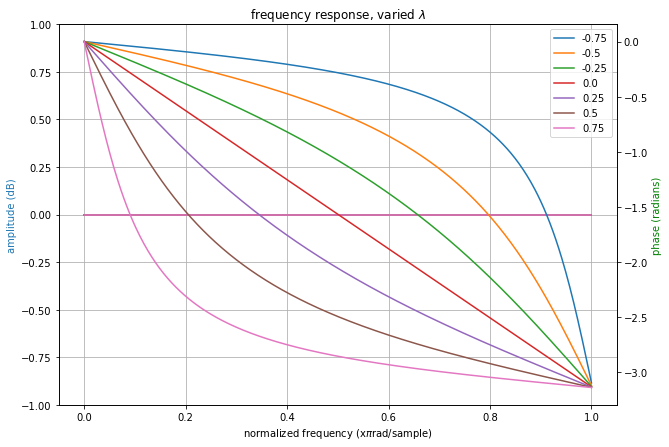

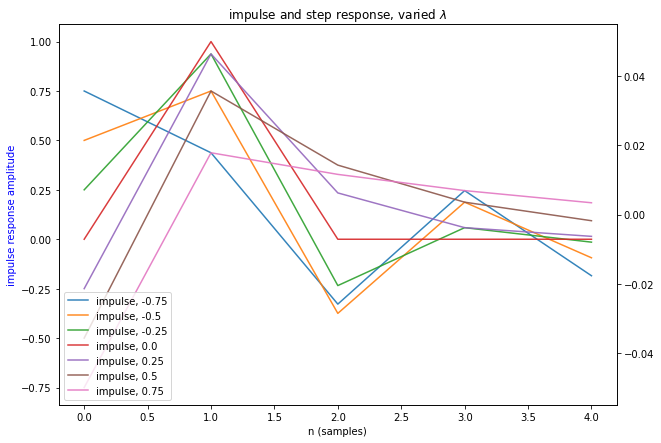

In [10]:
#Filtro passa todas 


warp_factors = np.linspace(-0.75, 0.75, 7)

fig1, ax11 = plt.subplots(figsize=(10, 7))
ax11.grid()
plt.title(r'frequency response, varied $\lambda$')
plt.ylim(-1, 1)
plt.ylabel('amplitude (dB)', color='C0')
plt.xlabel(r'normalized frequency (x$\pi$rad/sample)')

for i, wf in enumerate(warp_factors):
    w, h = scipy.signal.freqz([-wf, 1.0], [1.0, -wf])
    ax11.plot(w/max(w), 20 * np.log10(abs(h)), 'C{0}'.format(i), label=wf)
ax21 = ax11.twinx()
plt.ylabel('phase (radians)', color='g')

for i, wf in enumerate(warp_factors):
    w, h = scipy.signal.freqz([-wf, 1.0], [1.0, -wf])
    angles = np.unwrap(np.angle(h))
    ax21.plot(w/max(w), angles, 'C{0}'.format(i), label=wf)

ax11.legend(loc='upper right')

##############################################

fig3, ax3 = plt.subplots(figsize=(10, 7))
plt.title(r'impulse and step response, varied $\lambda$')
l = 5
x_axis = np.arange(l)
impulse = np.zeros(l); impulse[0] = 1.0
plt.xlabel('n (samples)')
plt.ylabel('impulse response amplitude', color='b')

for i, wf in enumerate(warp_factors):
    impulse_response = scipy.signal.lfilter([-wf, 1.0], [1.0, -wf], impulse)
    plt.plot(x_axis, impulse_response, label='impulse, {0}'.format(wf), color='C{0}'.format(i), alpha=0.9)

plt.legend(loc='lower left')
ax4 = ax3.twinx()


plt.axis('tight')
plt.show()



In [26]:
print(size(fir))
print(size(polo1))
cu, final = filtro_separavel(response,img)

16
16
(5,)
(1, 5)


In [22]:
type(polo1[1])

numpy.complex128